Diabetes prediction

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

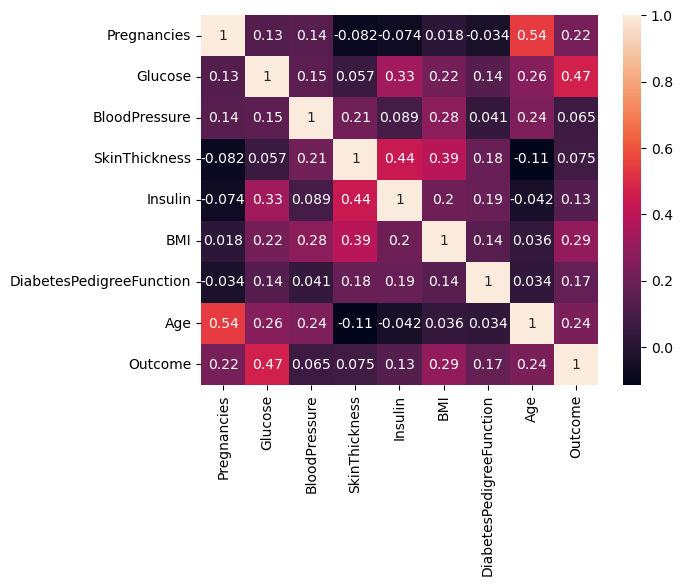

In [6]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [8]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


applying Logistic regression

In [9]:
lm = LogisticRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7402597402597403
Confusion Matrix:
[[121  30]
 [ 30  50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



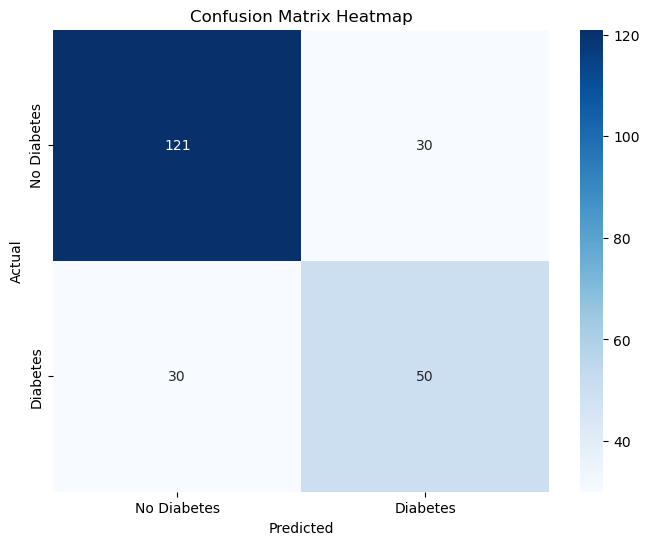

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [11]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

Accuracy: 0.683982683982684
Confusion Matrix:
[[106  45]
 [ 28  52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       151
           1       0.54      0.65      0.59        80

    accuracy                           0.68       231
   macro avg       0.66      0.68      0.67       231
weighted avg       0.70      0.68      0.69       231



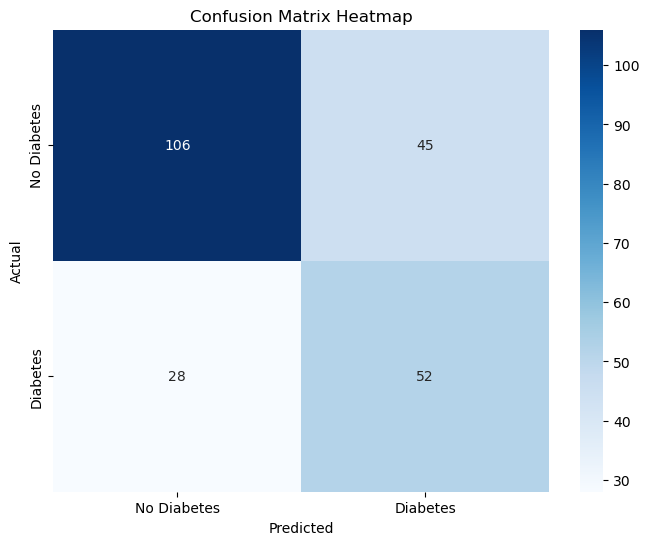

In [12]:
accuracy = accuracy_score(y_test, dt_y_pred)
conf_matrix = confusion_matrix(y_test, dt_y_pred)
class_report = classification_report(y_test, dt_y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [13]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

Accuracy: 0.7402597402597403
Confusion Matrix:
[[121  30]
 [ 30  50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



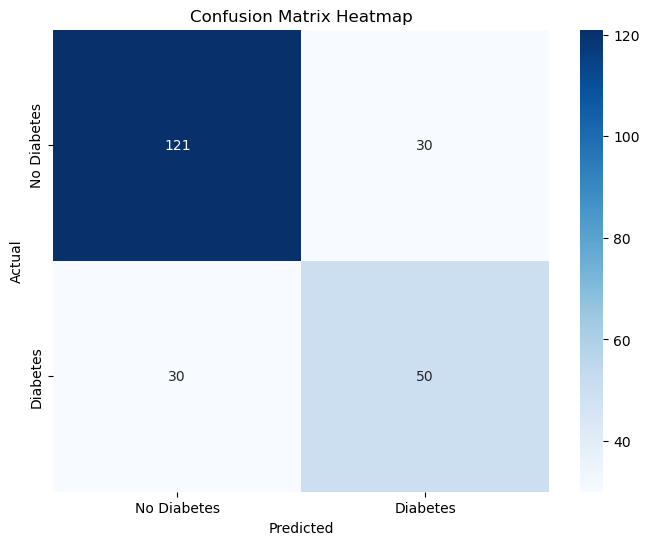

In [14]:
accuracy = accuracy_score(y_test, rf_y_pred)
conf_matrix = confusion_matrix(y_test, rf_y_pred)
class_report = classification_report(y_test, rf_y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

based on the models before applying standardization and with 70% of the data for testing we can deduce the following:

Logistic regression: 
accuracy: 0.7402597402597403
precision, recall and f1-score = 0.62

Decision Tree:
accuracy: 0.696
precision: 0.55
recall: 0.68
f1-score: 0.61

random forest:
accuracy: 0.7402
precision: 0.62
recall : 0.66
f1-score: 0.64

we can see that without standard scaler and lower data to test the random forest is the best performance

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [16]:
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


Accuracy: 0.7359307359307359
Confusion Matrix:
[[120  31]
 [ 30  50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



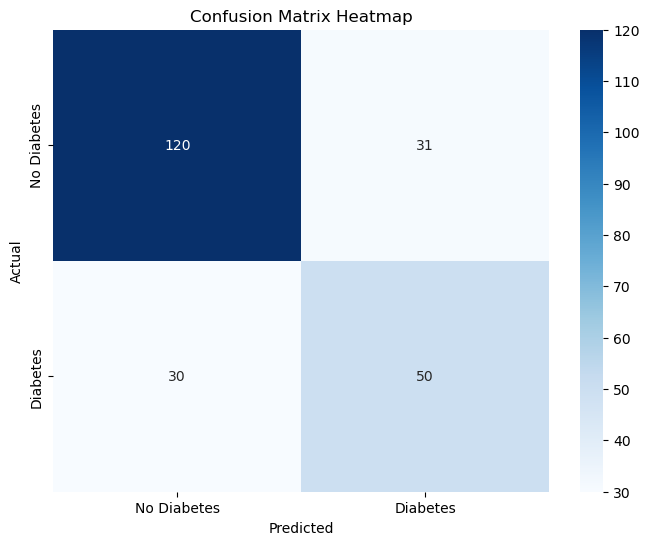

In [17]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Accuracy: 0.696969696969697
Confusion Matrix:
[[106  45]
 [ 25  55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       151
           1       0.55      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.70       231



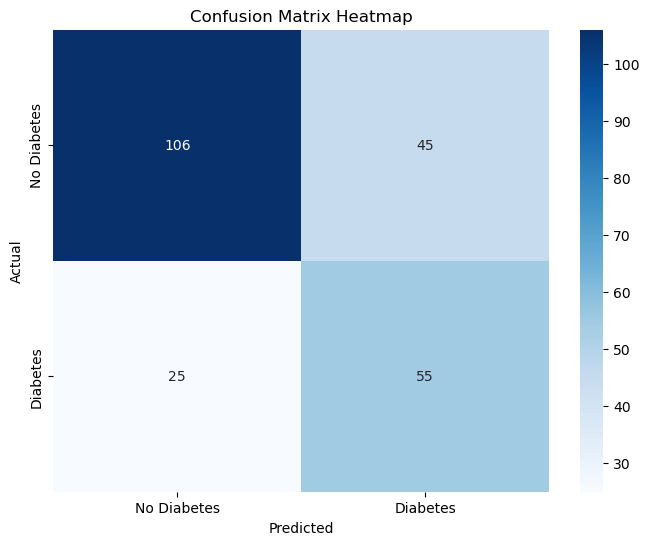

In [18]:
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, dt_y_pred)
conf_matrix = confusion_matrix(y_test, dt_y_pred)
class_report = classification_report(y_test, dt_y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Accuracy: 0.7402597402597403
Confusion Matrix:
[[120  31]
 [ 29  51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.64      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



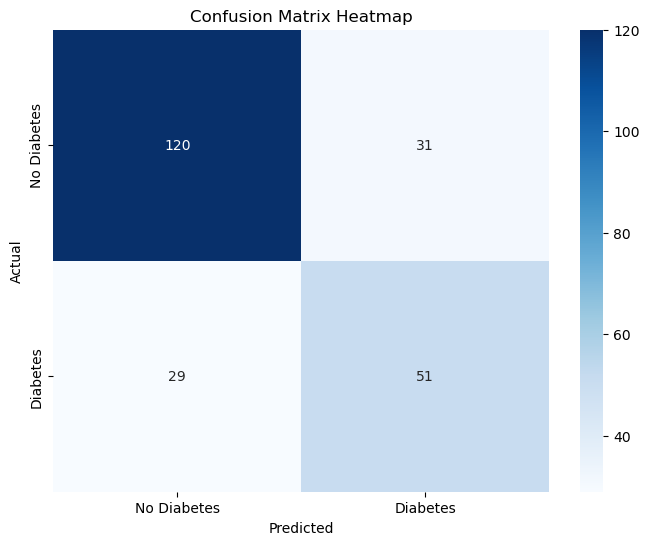

In [19]:
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, rf_y_pred)
conf_matrix = confusion_matrix(y_test, rf_y_pred)
class_report = classification_report(y_test, rf_y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

after applying standard scaler these are the new results

logistic regression:
accuracy: 0.7359
precision: 0.62
recall: 0.62
f1-score: 0.62

decision tree:
accuracy: 0.6969
precision: 0.55
recall: 0.69
f1-score: 0.61

random forest:
accuracy: 0.7402
precision: 0.62
recall: 0.64
f1-score: 0.63        

after applying standard scaler we can see that all models improved however the random forest still has the best performance which proves that random forest performs best with less data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Accuracy: 0.7597402597402597
Confusion Matrix:
[[78 21]
 [16 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



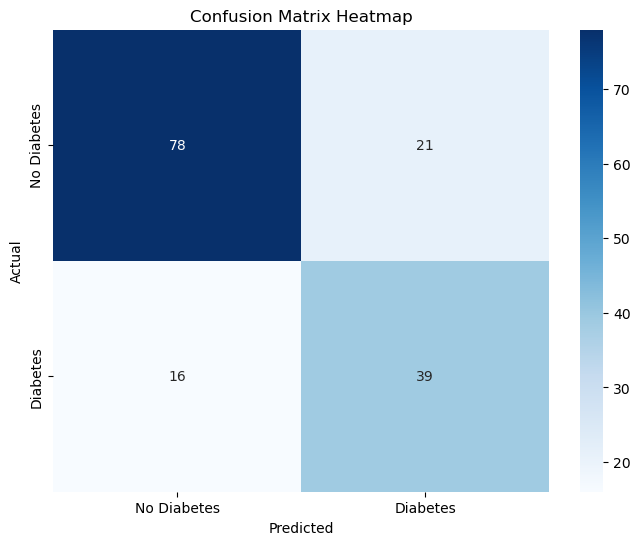

In [21]:
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, dt_y_pred)
conf_matrix = confusion_matrix(y_test, dt_y_pred)
class_report = classification_report(y_test, dt_y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Accuracy: 0.7532467532467533
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



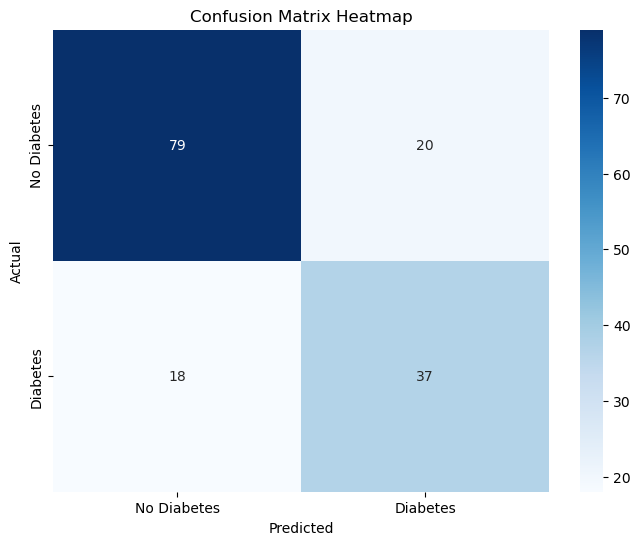

In [22]:
lm.fit(X_train, y_train)
lm_y_pred = lm.predict(X_test)

accuracy = accuracy_score(y_test, lm_y_pred)
conf_matrix = confusion_matrix(y_test, lm_y_pred)
class_report = classification_report(y_test, lm_y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Accuracy: 0.7532467532467533
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



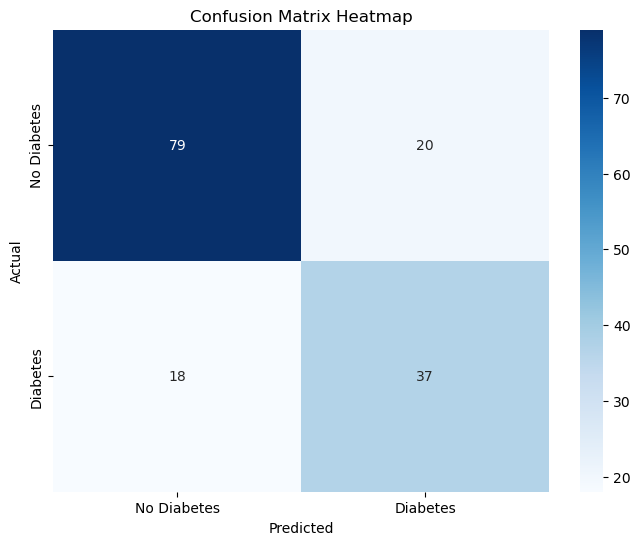

In [23]:
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, rf_y_pred)
conf_matrix = confusion_matrix(y_test, rf_y_pred)
class_report = classification_report(y_test, rf_y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

after we increased the training data size these are the results:

decision tree:
accuracy: 0.7597
precision: 0.65
recall: 0.71
f1-score: 0.68

logistic regression: 
accuracy: 0.7532
precision: 0.65
recall: 0.67
f1-score: 0.66

random forest: 
accuracy: 0.7532
precision: 0.65
recall: 0.67
f1-score: 0.66

this time we can see that decision tree has the best performance and both random forest and logistic regression are close and have the same performance

grid search requires tons of proecessing power so it takes a long time

In [34]:
from sklearn.model_selection import GridSearchCV

params = [{'max_depth': list(range(3, 11)),'max_features': list(range(1, 9))}]  
clf = GridSearchCV(rf, params, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
print("Best parameters found: ", clf.best_params_)
print("Best score found: ", clf.best_score_)
print("Best estimator found: ", clf.best_estimator_)
print("Best estimator's accuracy: ", clf.best_estimator_.score(X_test, y_test))

KeyboardInterrupt: 

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(Ridge(), params, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'alpha': 10}
0.2718140661468744
Ridge(alpha=10)


In [38]:
from sklearn.linear_model import LassoCV

alphas = [0.01, 0.1, 1, 10]
model = LassoCV(alphas=alphas, cv=5)
model.fit(X_train, y_train)

print("Best alpha:", model.alpha_)


Best alpha: 0.01


Accuracy: 0.7597402597402597
Confusion Matrix:
[[80 19]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



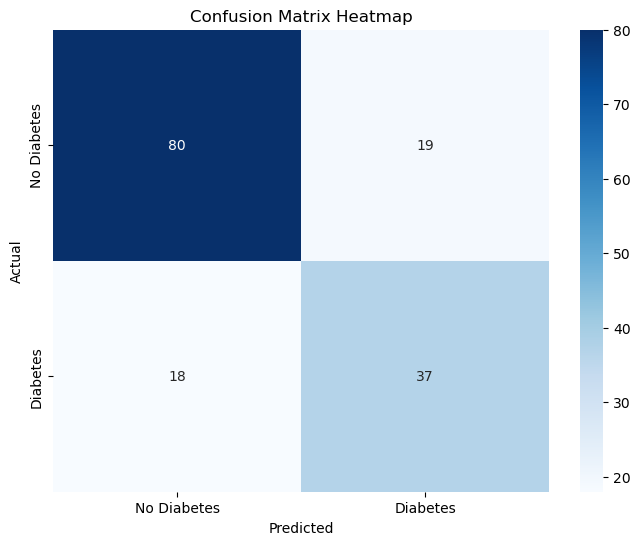

In [41]:
lm_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=0.1)
lm_l2.fit(X_train, y_train)
y_pred_l2 = lm_l2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_l2)
conf_matrix = confusion_matrix(y_test, y_pred_l2)
class_report = classification_report(y_test, y_pred_l2)

# Print evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Accuracy: 0.7532467532467533
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



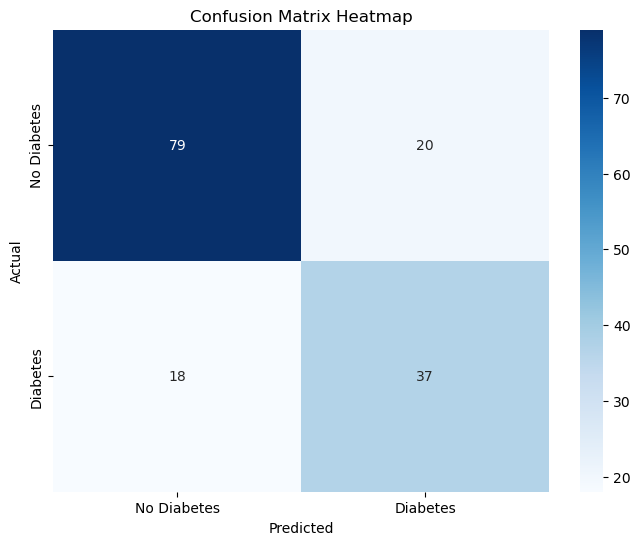

In [42]:
lm_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=100)  # C is the inverse of regularization strength
lm_l1.fit(X_train, y_train)
y_pred_l1 = lm_l1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_l1)
conf_matrix = confusion_matrix(y_test, y_pred_l1)
class_report = classification_report(y_test, y_pred_l1)

# Print evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

after applying the regularization and finding the best alpha value using grid search we can see that the ridge regularization increased the performance a bit